In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# Zobrazen√≠ prvn√≠ch ≈ô√°dk≈Ø a sloupc≈Ø obou soubor≈Ø
wires_in_df = pd.read_csv("./data/wires_in")
wires_out_df = pd.read_csv("./data/wires_out")

# P≈ôid√°n√≠ smƒõru a pot≈ôebn√Ωch sloupc≈Ø
wires_in_df["Beneficiary"] = wires_in_df["Account"]
wires_in_df["Direction"] = "in"

wires_out_df["Originator"] = wires_out_df["Account"]
wires_out_df["Direction"] = "out"


In [38]:
# Spojen√≠ dat
combined_df = pd.concat([wires_in_df, wires_out_df], ignore_index=True)

# P≈ôevod ID sloupc≈Ø na string
for col in ["Account", "Originator", "Beneficiary"]:
    combined_df[col] = combined_df[col].astype(str)

# V√Ωbƒõr transakc√≠ pro √∫ƒçet 10004000
account_id = "10004000"
account_in_preview = combined_df[
    (combined_df["Account"] == account_id) |
    (combined_df["Originator"] == account_id) |
    (combined_df["Beneficiary"] == account_id)
].copy()

# Statistika v√Ωskytu
account_in_account_col = (combined_df["Account"] == account_id).sum()
account_as_originator = (combined_df["Originator"] == account_id).sum()
account_as_beneficiary = (combined_df["Beneficiary"] == account_id).sum()

# Kreditn√≠ a debetn√≠ v√Ωbƒõr
credit_df = combined_df[combined_df["Beneficiary"] == account_id].copy()
debit_df = combined_df[combined_df["Originator"] == account_id].copy()

# N√°hled
credit_df.head(), debit_df.head(), account_in_preview.head()

(      Account Originator  Amount        Date Beneficiary Direction
 120  10004000       BLXK   19141  2000-01-02    10004000        in
 270  10004000       BLWI   16629  2000-01-04    10004000        in
 271  10004000       ADVI   17681  2000-01-04    10004000        in
 317  10004000       CKVT   19688  2000-01-04    10004000        in
 389  10004000       AVVY   19854  2000-01-05    10004000        in,
        Account Originator  Amount        Date Beneficiary Direction
 4983  10004000   10004000   17165  2000-01-01        CCLC       out
 5175  10004000   10004000   11013  2000-01-03        CCLC       out
 5176  10004000   10004000   15343  2000-01-03        BLWI       out
 5203  10004000   10004000   14958  2000-01-03        BGHY       out
 5204  10004000   10004000   15156  2000-01-03        BLXK       out,
       Account Originator  Amount        Date Beneficiary Direction
 120  10004000       BLXK   19141  2000-01-02    10004000        in
 270  10004000       BLWI   16629  2000-

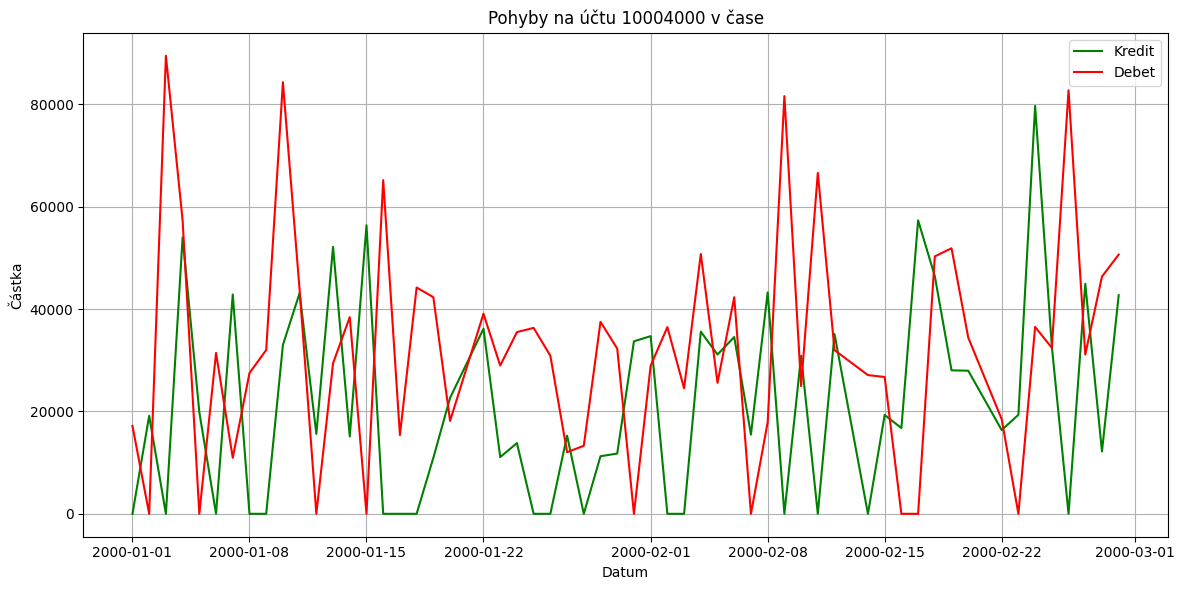

In [39]:
# P≈ôevod datumu
credit_df["Date"] = pd.to_datetime(credit_df["Date"])
debit_df["Date"] = pd.to_datetime(debit_df["Date"])

# Souƒçty po dnech
credit_time_series = credit_df.groupby("Date")["Amount"].sum().rename("Kredit")
debit_time_series = debit_df.groupby("Date")["Amount"].sum().rename("Debet")
time_series = pd.concat([credit_time_series, debit_time_series], axis=1).fillna(0)

# Graf
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series["Kredit"], label="Kredit", color='green')
plt.plot(time_series.index, time_series["Debet"], label="Debet", color='red')
plt.title("Pohyby na √∫ƒçtu 10004000 v ƒçase")
plt.xlabel("Datum")
plt.ylabel("ƒå√°stka")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


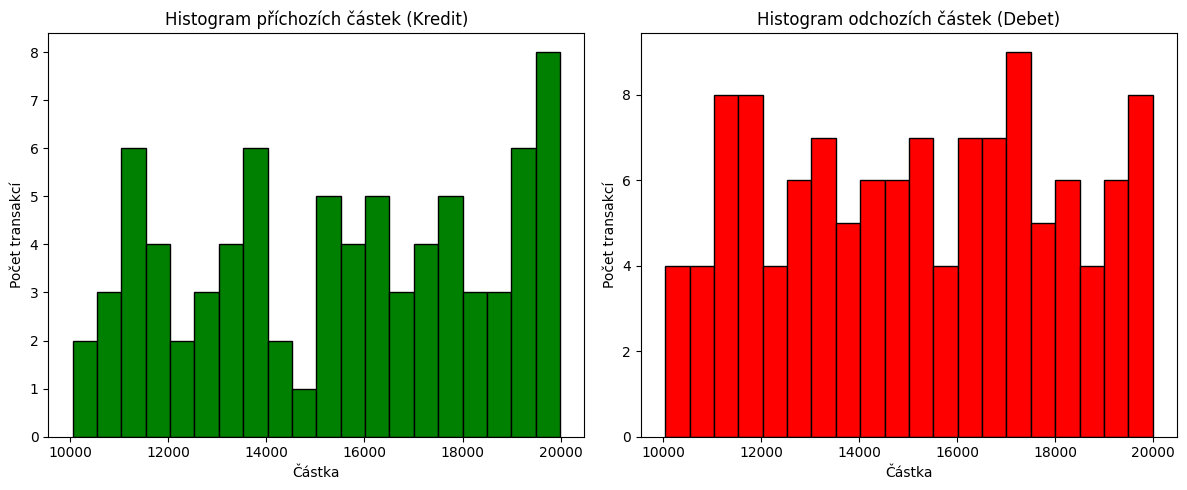

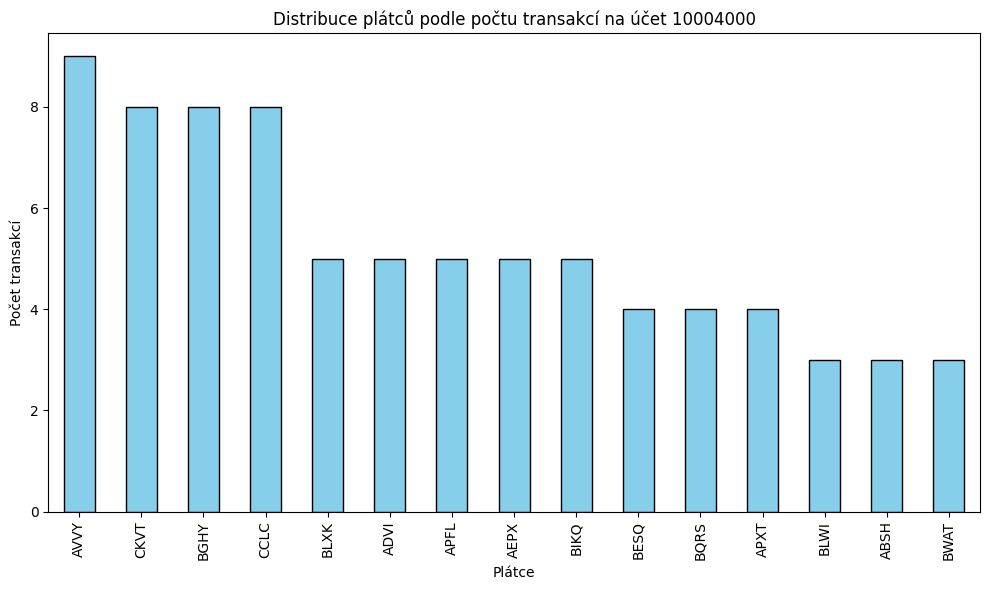

In [40]:
# Histogram ƒç√°stek pro p≈ô√≠choz√≠ i odchoz√≠ transakce
plt.figure(figsize=(12, 5))

# Histogram kreditn√≠ch ƒç√°stek
plt.subplot(1, 2, 1)
plt.hist(credit_df["Amount"], bins=20, color='green', edgecolor='black')
plt.title("Histogram p≈ô√≠choz√≠ch ƒç√°stek (Kredit)")
plt.xlabel("ƒå√°stka")
plt.ylabel("Poƒçet transakc√≠")

# Histogram debetn√≠ch ƒç√°stek
plt.subplot(1, 2, 2)
plt.hist(debit_df["Amount"], bins=20, color='red', edgecolor='black')
plt.title("Histogram odchoz√≠ch ƒç√°stek (Debet)")
plt.xlabel("ƒå√°stka")
plt.ylabel("Poƒçet transakc√≠")

plt.tight_layout()
plt.show()

# Distribuce pl√°tc≈Ø podle poƒçtu transakc√≠
payer_distribution = credit_df["Originator"].value_counts()

plt.figure(figsize=(10, 6))
payer_distribution.plot(kind="bar", color='skyblue', edgecolor='black')
plt.title("Distribuce pl√°tc≈Ø podle poƒçtu transakc√≠ na √∫ƒçet 10004000")
plt.xlabel("Pl√°tce")
plt.ylabel("Poƒçet transakc√≠")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [41]:
# Statistiky pl√°tc≈Ø (Originator) ‚Üí √∫ƒçet 10004000
payers_stats = (
    credit_df.groupby("Originator")["Amount"]
    .agg(["count", "sum", "mean", "min", "max", "std"])
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .rename(columns={
        "Originator": "Pl√°tce",
        "count": "Poƒçet",
        "sum": "Souƒçet",
        "mean": "Pr≈Ømƒõr",
        "min": "Min",
        "max": "Max",
        "std": "Smƒõrodatn√° odchylka"
    })
)

# Statistiky p≈ô√≠jemc≈Ø (Beneficiary) ‚Üê z √∫ƒçtu 10004000
receivers_stats = (
    debit_df.groupby("Beneficiary")["Amount"]
    .agg(["count", "sum", "mean", "min", "max", "std"])
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .rename(columns={
        "Beneficiary": "P≈ô√≠jemce",
        "count": "Poƒçet",
        "sum": "Souƒçet",
        "mean": "Pr≈Ømƒõr",
        "min": "Min",
        "max": "Max",
        "std": "Smƒõrodatn√° odchylka"
    })
)

In [42]:

#V√Ωpis statistik do konzole Jupyter notebooku

print("Statistiky pl√°tc≈Ø ‚Üí √∫ƒçet 10004000 (TOP 15 podle ƒç√°stky):")
display(payers_stats.head(15))

print("\nStatistiky p≈ô√≠jemc≈Ø ‚Üê z √∫ƒçtu 10004000 (TOP 15 podle ƒç√°stky):")
display(receivers_stats.head(15))


Statistiky pl√°tc≈Ø ‚Üí √∫ƒçet 10004000 (TOP 15 podle ƒç√°stky):


Pl√°tce  Poƒçet  Souƒçet        Pr≈Ømƒõr    Min    Max  Smƒõrodatn√° odchylka
0    AVVY      9  148467  16496.333333  11773  19986          2976.505165
1    CKVT      8  129544  16193.000000  11083  19688          3600.212335
2    CCLC      8  117658  14707.250000  10350  18847          3023.863931
3    BGHY      8  115699  14462.375000  10942  19855          3121.778153
4    AEPX      5   81430  16286.000000  11122  19313          3197.516614
5    BLXK      5   78681  15736.200000  10928  19775          4408.281037
6    ADVI      5   76799  15359.800000  11672  19876          3329.830731
7    APFL      5   70899  14179.800000  11572  19260          3003.086279
8    BIKQ      5   68729  13745.800000  11196  17572          2595.040308
9    APXT      4   67961  16990.250000  14917  19343          1919.019085
10   BQRS      4   67324  16831.000000  14280  19952          2342.776416
11   BESQ      4   58067  14516.750000  10054  19129          3767.460893
12   BWAT      3   51462  17154.000000  16279  17824           792.638001
13   BLWI      3   46223  15407.666667  12182  17412          2820.809517
14   ABSH      3   43219  14406.333333  12998  16752          2045.012062


Statistiky p≈ô√≠jemc≈Ø ‚Üê z √∫ƒçtu 10004000 (TOP 15 podle ƒç√°stky):


P≈ô√≠jemce  Poƒçet  Souƒçet        Pr≈Ømƒõr    Min    Max  Smƒõrodatn√° odchylka
0      BIKQ     13  195547  15042.076923  10938  19756          2608.688670
1      BWAT     11  183799  16709.000000  10039  19992          3406.066705
2      APFL     11  167209  15200.818182  10241  18071          2783.505733
3      ABSH     10  164061  16406.100000  11685  19834          2358.539965
4      AEPX     10  154906  15490.600000  11094  19522          3425.903813
5      BESQ      9  129235  14359.444444  10097  19435          3385.531646
6      BGHY      8  125622  15702.750000  12110  19248          2710.334178
7      APXT      8  116440  14555.000000  10298  17623          2240.927614
8      CCLC      8  116200  14525.000000  11013  19498          3120.549036
9      BLXK      8  115068  14383.500000  11200  19672          3223.991758
10     AVVY      6   90210  15035.000000  12944  18514          2114.608427
11     BQRS      6   85990  14331.666667  10566  19923          3673.502017
12     BLWI      5   74725  14945.000000  11695  18142          2315.585131
13     CKVT      5   68704  13740.800000  11065  16747          2217.639556
14     ADVI      3   45240  15080.000000  12372  19060          3520.770370

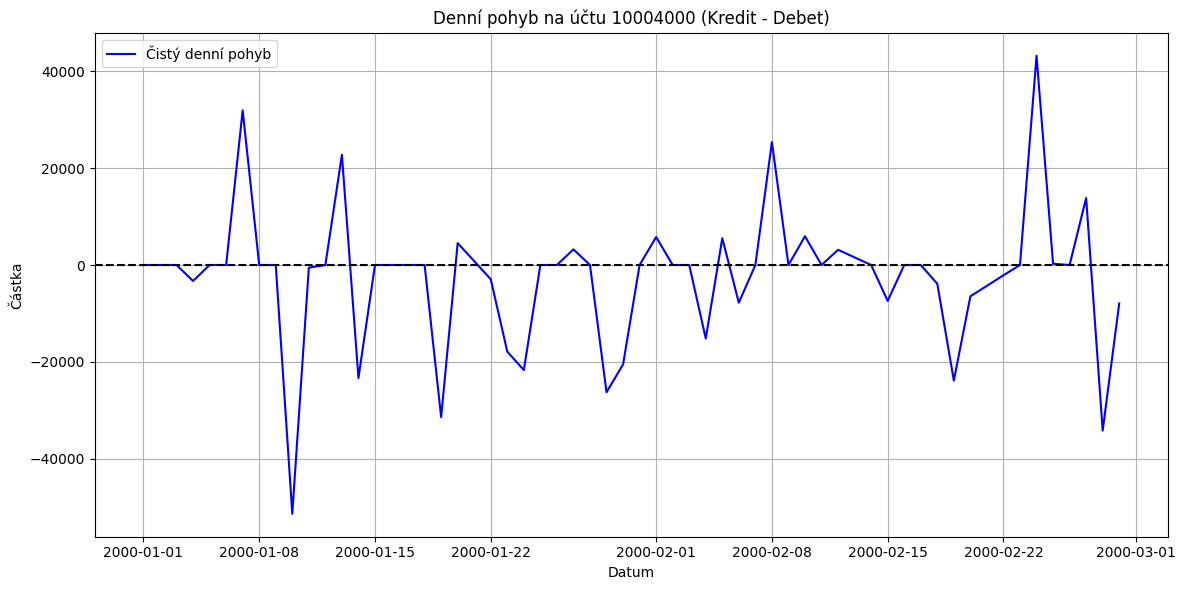

{'Nejvy≈°≈°√≠ p≈ô√≠liv': (datetime.date(2000, 2, 24), np.float64(43173.0)),
 'Nejvy≈°≈°√≠ odliv': (datetime.date(2000, 1, 10), np.float64(-51333.0)),
 'Pr≈Ømƒõrn√Ω denn√≠ pohyb': np.float64(-2500.6491228070176),
 'Smƒõrodatn√° odchylka': np.float64(14822.625152462064),
 '95. percentil (horn√≠ hranice)': np.float64(23262.599999999988),
 '5. percentil (doln√≠ hranice)': np.float64(-27281.6),
 'Poƒçet extr√©mn√≠ch dn≈Ø': 6,
 'Extr√©mn√≠ dny': Date
 2000-01-07    31899.0
 2000-01-10   -51333.0
 2000-01-19   -31376.0
 2000-02-08    25365.0
 2000-02-24    43173.0
 2000-02-28   -34164.0
 Name: ƒåist√Ω pohyb, dtype: float64}

In [46]:
# Denn√≠ pohyby: rozd√≠l kredit - debet ka≈æd√Ω den
daily_movement = (credit_time_series - debit_time_series).rename("ƒåist√Ω pohyb")

# Vyplnƒõn√≠ chybƒõj√≠c√≠ch dn≈Ø nulou
daily_movement = daily_movement.fillna(0)

# Vykreslen√≠ ƒçist√©ho denn√≠ho pohybu
plt.figure(figsize=(12, 6))
plt.plot(daily_movement.index, daily_movement.values, label="ƒåist√Ω denn√≠ pohyb", color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Denn√≠ pohyb na √∫ƒçtu 10004000 (Kredit - Debet)")
plt.xlabel("Datum")
plt.ylabel("ƒå√°stka")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# V√Ωpoƒçet z√°kladn√≠ch statistik pro denn√≠ pohyb
max_inflow_day = daily_movement.idxmax()
max_inflow_value = daily_movement.max()

max_outflow_day = daily_movement.idxmin()
max_outflow_value = daily_movement.min()

mean_movement = daily_movement.mean()
std_movement = daily_movement.std()

# Oznaƒçen√≠ extr√©mn√≠ch dn≈Ø (95. a 5. percentil)
threshold_high = daily_movement.quantile(0.95)
threshold_low = daily_movement.quantile(0.05)

extreme_days = daily_movement[(daily_movement >= threshold_high) | (daily_movement <= threshold_low)]

# V√Ωpis anal√Ωzy
{
    "Nejvy≈°≈°√≠ p≈ô√≠liv": (max_inflow_day.date(), max_inflow_value),
    "Nejvy≈°≈°√≠ odliv": (max_outflow_day.date(), max_outflow_value),
    "Pr≈Ømƒõrn√Ω denn√≠ pohyb": mean_movement,
    "Smƒõrodatn√° odchylka": std_movement,
    "95. percentil (horn√≠ hranice)": threshold_high,
    "5. percentil (doln√≠ hranice)": threshold_low,
    "Poƒçet extr√©mn√≠ch dn≈Ø": extreme_days.shape[0],
    "Extr√©mn√≠ dny": extreme_days
}


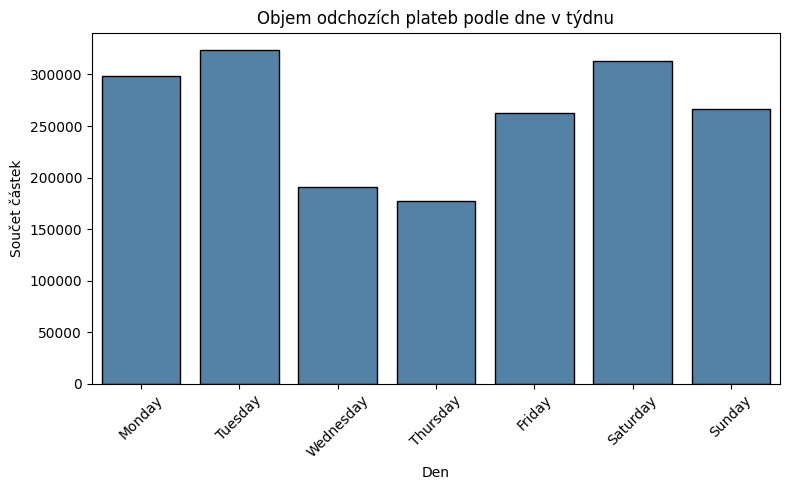

B  Amount_out   Date_out  Amount_in    Date_in
0    CCLC       17165 2000-01-01      13815 2000-01-24
1    CCLC       17165 2000-01-01      11249 2000-01-29
2    CCLC       17165 2000-01-01      18010 2000-01-31
3    CCLC       17165 2000-01-01      10350 2000-02-04
4    CCLC       17165 2000-01-01      13563 2000-02-04
..    ...         ...        ...        ...        ...
525  BWAT       19772 2000-02-20      17359 2000-02-24
541  APFL       18071 2000-02-24      19260 2000-02-27
566  BQRS       17192 2000-02-26      14280 2000-02-27
578  BGHY       18167 2000-02-27      11075 2000-02-29
587  AVVY       12944 2000-02-27      14015 2000-02-29

[354 rows x 5 columns]

√öƒçet  Poƒçet p≈ô√≠choz√≠ch  Poƒçet odchoz√≠ch  Celkem
1   BIKQ                 5               13      18
5   CCLC                 8                8      16
11  BGHY                 8                8      16
14  APFL                 5               11      16
6   AVVY                 9                6      15
9   AEPX                 5               10      15
12  BWAT                 3               11      14
0   ABSH                 3               10      13
8   CKVT                 8                5      13
10  BESQ                 4                9      13

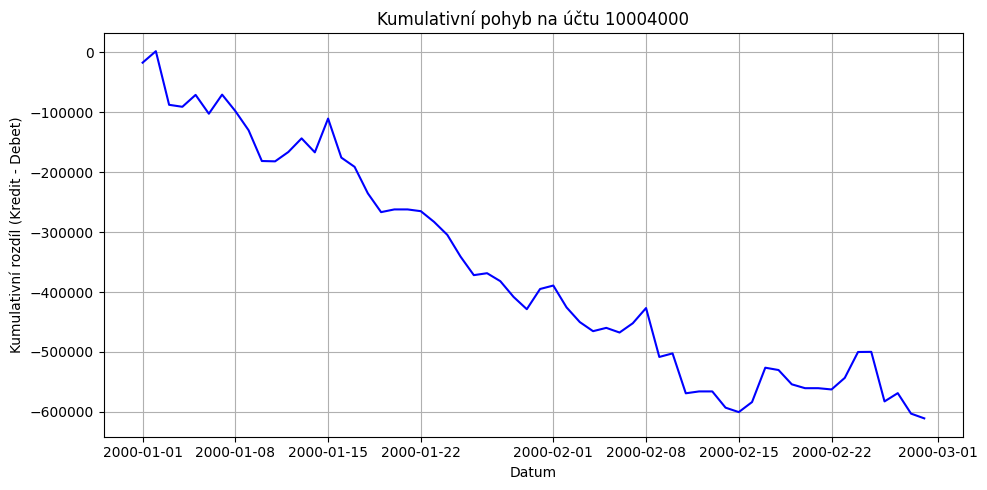

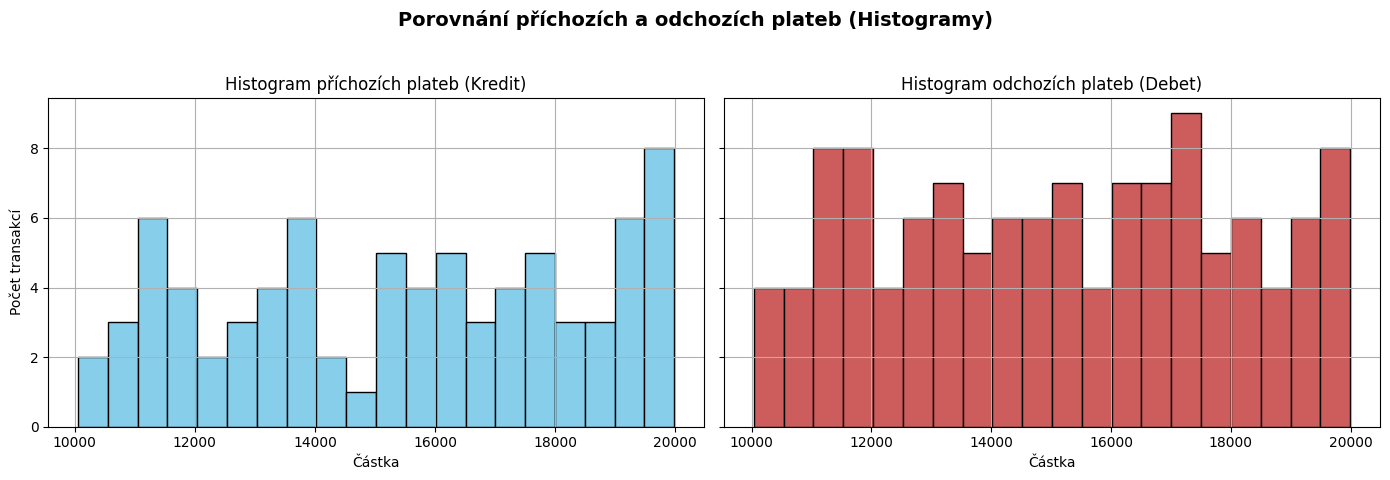

In [52]:
import seaborn as sns
from matplotlib.colors import LogNorm

# 1. üîÅ Podez≈ôel√© kruhov√© transakce (2-stup≈àov√© zpƒõtn√© platby)
# Krok 1: √∫ƒçet 10004000 ‚Üí B ‚Üí C
outgoing = debit_df[["Beneficiary", "Amount", "Date"]].copy()
outgoing.columns = ["B", "Amount", "Date"]
incoming = credit_df[["Originator", "Amount", "Date"]].copy()
incoming.columns = ["B", "Amount", "Date"]

# Najdeme √∫ƒçty, kter√© poslaly pen√≠ze 10004000 A POZDƒöJI obdr≈æely od nƒõj platbu (2-krokov√Ω cyklus)
circle_accounts = pd.merge(outgoing, incoming, on="B", suffixes=("_out", "_in"))
circle_accounts_filtered = circle_accounts[circle_accounts["Date_out"] < circle_accounts["Date_in"]]

# 3. üìà Kumulativn√≠ pohyb
daily_balance = (credit_time_series - debit_time_series).cumsum()

# 4. üìÖ Heatmapa podle dne v t√Ωdnu
combined_df["Date"] = pd.to_datetime(combined_df["Date"])
combined_df["Weekday"] = combined_df["Date"].dt.day_name()
combined_df["Direction"] = combined_df["Direction"].fillna("")

weekday_volume = (
    combined_df[combined_df["Originator"] == account_id]
    .groupby("Weekday")["Amount"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

# 5. üéØ Top N √∫ƒçt≈Ø s obousmƒõrn√Ωm tokem
credit_partners = set(credit_df["Originator"])
debit_partners = set(debit_df["Beneficiary"])
bidirectional_partners = credit_partners & debit_partners

bidirectional_df = pd.DataFrame(bidirectional_partners, columns=["√öƒçet"])
bidirectional_df["Poƒçet p≈ô√≠choz√≠ch"] = bidirectional_df["√öƒçet"].map(credit_df["Originator"].value_counts())
bidirectional_df["Poƒçet odchoz√≠ch"] = bidirectional_df["√öƒçet"].map(debit_df["Beneficiary"].value_counts())
bidirectional_df["Celkem"] = bidirectional_df["Poƒçet p≈ô√≠choz√≠ch"] + bidirectional_df["Poƒçet odchoz√≠ch"]
bidirectional_df = bidirectional_df.sort_values(by="Celkem", ascending=False)


# Heatmapa objemu podle dne v t√Ωdnu
plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_volume.index, y=weekday_volume.values, color="steelblue", edgecolor='black')
plt.title("Objem odchoz√≠ch plateb podle dne v t√Ωdnu")
plt.ylabel("Souƒçet ƒç√°stek")
plt.xlabel("Den")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# V√Ωpis kruhov√Ωch transakc√≠ a obousmƒõrn√Ωch partner≈Ø
display(circle_accounts_filtered, bidirectional_df.head(10))


# --- GRAFY ---
# 3. Kumulativn√≠ pohyb
# Agregace podle data (souƒçet ƒç√°stek za ka≈æd√Ω den)
credit_daily = credit_df.groupby("Date")["Amount"].sum()
debit_daily = debit_df.groupby("Date")["Amount"].sum()

full_range = pd.date_range(start=min(credit_daily.index.min(), debit_daily.index.min()),
                           end=max(credit_daily.index.max(), debit_daily.index.max()))

# Znovu vytvo≈ô√≠me denn√≠ s√©rie s nulami pro chybƒõj√≠c√≠ dny
credit_full = credit_daily.reindex(full_range, fill_value=0)
debit_full = debit_daily.reindex(full_range, fill_value=0)
# V√Ωpoƒçet kumulativn√≠ho rozd√≠lu
credit_cumsum = credit_full.cumsum()
debit_cumsum = debit_full.cumsum()
cumulative_balance = credit_cumsum - debit_cumsum


plt.figure(figsize=(10, 5))
plt.plot(cumulative_balance.index, cumulative_balance.values, color='blue')
plt.title("Kumulativn√≠ pohyb na √∫ƒçtu 10004000")
plt.xlabel("Datum")
plt.ylabel("Kumulativn√≠ rozd√≠l (Kredit - Debet)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram ƒç√°stek pro kreditn√≠ a debetn√≠ platby ‚Äì vedle sebe
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Histogram kreditn√≠ch (p≈ô√≠choz√≠ch) plateb
axs[0].hist(credit_df["Amount"], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("Histogram p≈ô√≠choz√≠ch plateb (Kredit)")
axs[0].set_xlabel("ƒå√°stka")
axs[0].set_ylabel("Poƒçet transakc√≠")
axs[0].grid(True)

# Histogram debetn√≠ch (odchoz√≠ch) plateb
axs[1].hist(debit_df["Amount"], bins=20, color='indianred', edgecolor='black')
axs[1].set_title("Histogram odchoz√≠ch plateb (Debet)")
axs[1].set_xlabel("ƒå√°stka")
axs[1].grid(True)

plt.suptitle("Porovn√°n√≠ p≈ô√≠choz√≠ch a odchoz√≠ch plateb (Histogramy)", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


{('BLXK', '10004000'): Text(0.33484504439977913, -0.1772349498269467, '17827'),
 ('10004000', 'CCLC'): Text(0.15621151994617422, 0.30009757162525996, '14441'),
 ('10004000', 'BLWI'): Text(0.37881194967259196, 0.30846451895805793, '15245'),
 ('10004000',
  'BGHY'): Text(-0.4482878139437974, -0.04503280076119098, '18167'),
 ('10004000', 'BLXK'): Text(0.33484504439977913, -0.1772349498269467, '19672'),
 ('10004000',
  'AEPX'): Text(-0.20914739086569364, 0.21599369740320365, '12649'),
 ('10004000', 'ABSH'): Text(0.2715890346274458, -0.21985932047423995, '19834'),
 ('10004000', 'BQRS'): Text(-0.14766572738470077, 0.3415184689381605, '17192'),
 ('10004000',
  'APFL'): Text(0.015682110554220974, -0.33490087612764036, '11697'),
 ('10004000', 'BIKQ'): Text(-0.4805921816338196, 0.03464641438676757, '19756'),
 ('10004000', 'ADVI'): Text(0.0811110157123745, 0.5037799167173831, '19060'),
 ('10004000',
  'APXT'): Text(-0.03179210705743833, -0.35172971984697493, '14535'),
 ('10004000', 'BWAT'): Text(

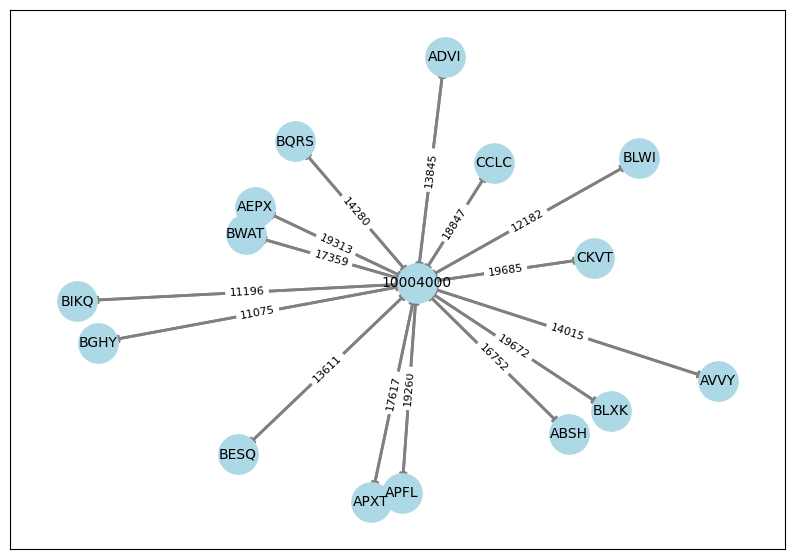

In [53]:
# Filtrov√°n√≠ transakc√≠ pouze mezi √∫ƒçtem 10004000 a obousmƒõrn√Ωmi √∫ƒçty
bidirectional_ids = set(bidirectional_df["√öƒçet"])

# Transakce mezi 10004000 a obousmƒõrn√Ωmi partnery
network_df = combined_df[
    ((combined_df["Originator"] == account_id) & (combined_df["Beneficiary"].isin(bidirectional_ids))) |
    ((combined_df["Beneficiary"] == account_id) & (combined_df["Originator"].isin(bidirectional_ids)))
]

# Vytvo≈ôen√≠ grafu
G = nx.DiGraph()
for _, row in network_df.iterrows():
    G.add_edge(row["Originator"], row["Beneficiary"], weight=row["Amount"])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

# Vykreslen√≠ uzl≈Ø a hran
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10)

# Vykreslen√≠ hran a popisk≈Ø ƒç√°stek
weights = [d["weight"] for _, _, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, arrows=True)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)





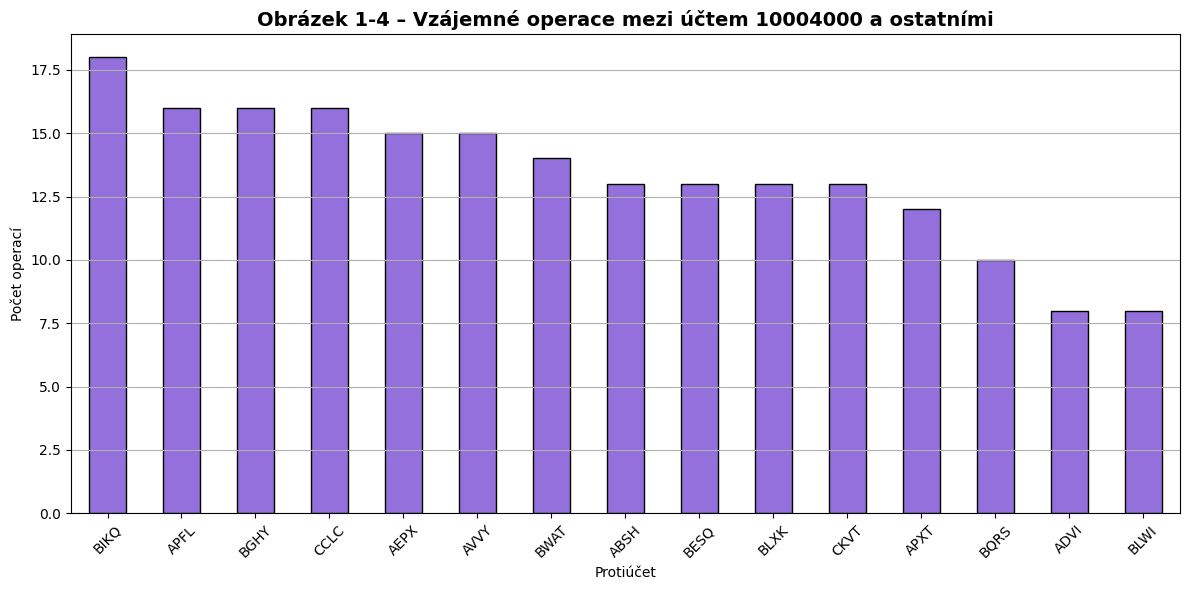

In [54]:
# Obr√°zek 1-4 ‚Äì sloupcov√Ω graf vz√°jemn√Ωch operac√≠ (ƒçetnosti) mezi √∫ƒçtem 10004000 a ostatn√≠mi

# Spoƒç√≠t√°me ƒçetnost interakc√≠ s ostatn√≠mi √∫ƒçty (p≈ô√≠choz√≠ + odchoz√≠)
in_counts_named = credit_df["Originator"].value_counts()
out_counts_named = debit_df["Beneficiary"].value_counts()

# Slouƒçen√≠ poƒçt≈Ø pro obousmƒõrn√© zobrazen√≠
interaction_counts = (in_counts_named + out_counts_named).sort_values(ascending=False)

# Vybereme top 15 partner≈Ø
interaction_counts_top = interaction_counts.head(15)

# Sloupcov√Ω graf
plt.figure(figsize=(12, 6))
interaction_counts_top.plot(kind="bar", color="mediumpurple", edgecolor='black')
plt.title("Obr√°zek 1-4 ‚Äì Vz√°jemn√© operace mezi √∫ƒçtem 10004000 a ostatn√≠mi", fontsize=14, fontweight='bold')
plt.xlabel("Proti√∫ƒçet")
plt.ylabel("Poƒçet operac√≠")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/Users/pvacha/projects/tul/dm-money-laundering/jlab_env/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:1239: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/pvacha/projects/tul/dm-money-laundering/jlab_env/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:1239: RuntimeWarning: overflow encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


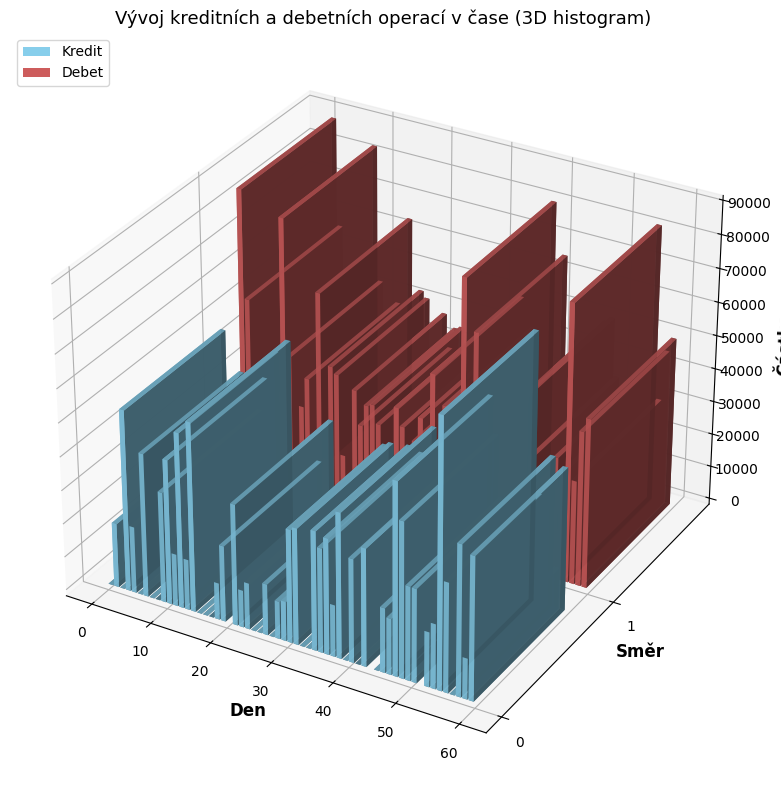

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

credit_hist = credit_df.groupby("Date")["Amount"].sum().rename("Kredit")
debit_hist = debit_df.groupby("Date")["Amount"].sum().rename("Debet")
hist_df = pd.concat([credit_hist, debit_hist], axis=1).fillna(0)


# P≈ôevod dat na form√°t vhodn√Ω pro 3D histogram
hist_df_reset = hist_df.reset_index()
hist_df_reset["Day"] = (hist_df_reset["Date"] - hist_df_reset["Date"].min()).dt.days

#ruƒçnƒõ vytvo≈ô√≠me legendu pomoc√≠ patch≈Ø m√≠sto automatick√©ho p≈ôevzet√≠ z bar3d
from matplotlib.patches import Patch

# Znovu vytvo≈ôen√≠ grafu
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = hist_df_reset["Day"].values
y_kredit = np.zeros_like(x)
y_debet = np.ones_like(x)
z = np.zeros_like(x)

dx = dy = 0.8
dz_kredit = hist_df_reset["Kredit"].values
dz_debet = hist_df_reset["Debet"].values

# Bar3D pro kredit a debet
ax.bar3d(x, y_kredit, z, dx, dy, dz_kredit, color='skyblue', alpha=0.9)
ax.bar3d(x, y_debet, z, dx, dy, dz_debet, color='indianred', alpha=0.9)

# Osy
ax.set_xlabel('Den', fontsize=12, fontweight='bold')
ax.set_ylabel('Smƒõr', fontsize=12, fontweight='bold')
ax.set_zlabel('ƒå√°stka', fontsize=12, fontweight='bold', labelpad=10)
ax.set_yticks([0, 1])

# Ruƒçn√≠ legenda
legend_patches = [
    Patch(facecolor='skyblue', label='Kredit'),
    Patch(facecolor='indianred', label='Debet')
]
plt.legend(handles=legend_patches, loc='upper left')

plt.title('V√Ωvoj kreditn√≠ch a debetn√≠ch operac√≠ v ƒçase (3D histogram)', fontsize=13)
plt.tight_layout()
plt.show()


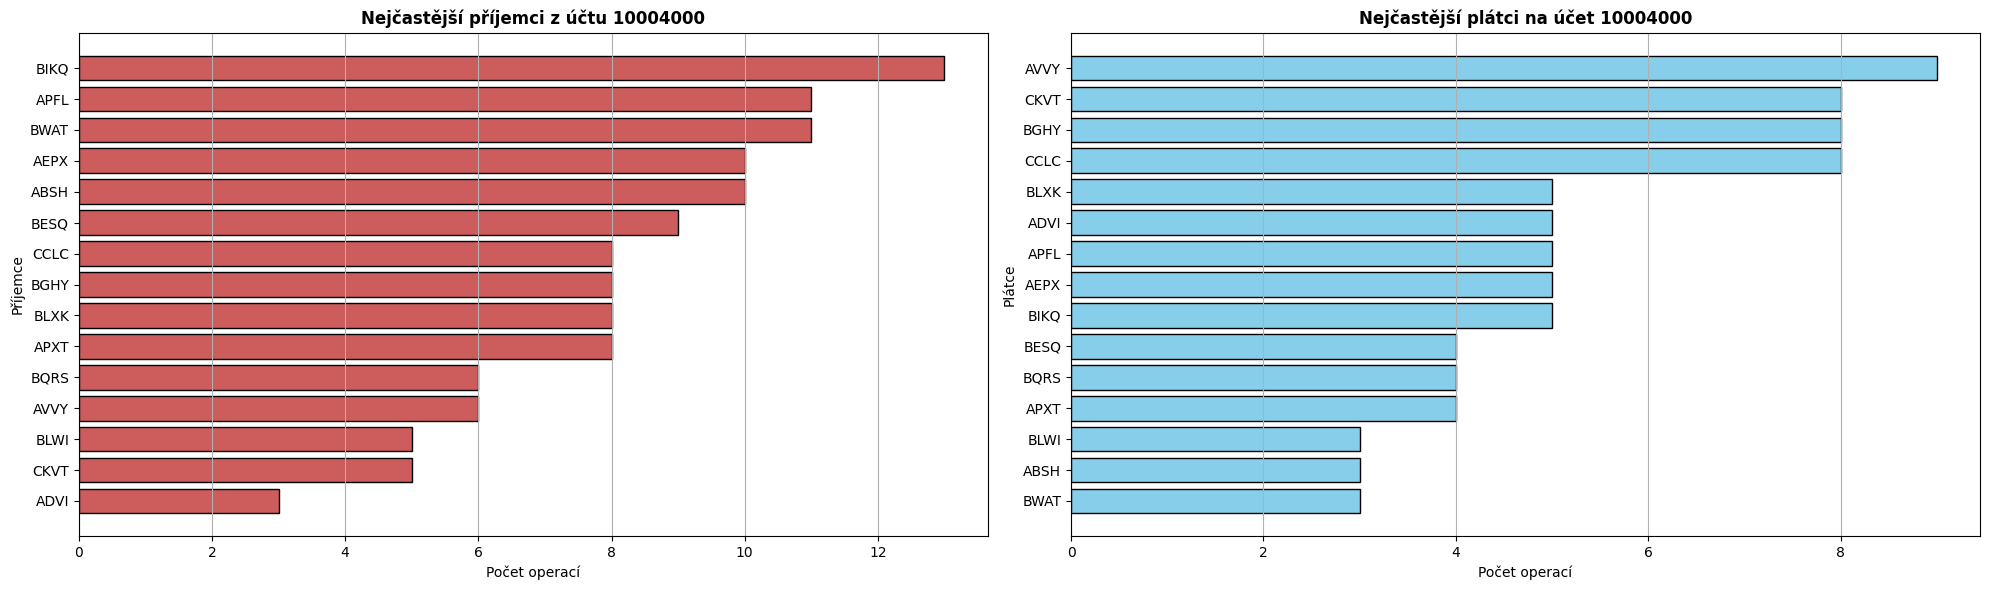

In [57]:
debit_counts = debit_df["Beneficiary"].value_counts().head(20)

# Obr√°zek 1-4B ‚Äì podle odesilatel≈Ø (Originator), kdo pos√≠l√° √∫ƒçtu 10004000
credit_counts = credit_df["Originator"].value_counts().head(20)

fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=False)

# Graf 1 ‚Äì P≈ô√≠jemci (Beneficiary)
axs[0].barh(debit_counts.index[::-1], debit_counts.values[::-1], color='indianred', edgecolor='black')
axs[0].set_title("Nejƒçastƒõj≈°√≠ p≈ô√≠jemci z √∫ƒçtu 10004000", fontweight='bold')
axs[0].set_xlabel("Poƒçet operac√≠")
axs[0].set_ylabel("P≈ô√≠jemce")
axs[0].grid(True, axis='x')

# Graf 2 ‚Äì Odesilatel√© (Originator)
axs[1].barh(credit_counts.index[::-1], credit_counts.values[::-1], color='skyblue', edgecolor='black')
axs[1].set_title("Nejƒçastƒõj≈°√≠ pl√°tci na √∫ƒçet 10004000", fontweight='bold')
axs[1].set_xlabel("Poƒçet operac√≠")
axs[1].set_ylabel("Pl√°tce")
axs[1].grid(True, axis='x')

plt.tight_layout()
plt.show()
